In [1]:
import warnings 

In [3]:
import pandas as pd
import numpy as np 
np.set_printoptions(precision=4, linewidth=100) 

In [4]:
mba_salary_df = pd.read_csv( 'MBA Salary.csv' ) 

In [5]:
mba_salary_df.head( 10 ) 

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [6]:
## More information about the dataset
mba_salary_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
S. No.                    50 non-null int64
Percentage in Grade 10    50 non-null float64
Salary                    50 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 KB


In [8]:
## Creating Feature Set(X) and Outcome Variable(Y)
import statsmodels.api as sm 
## stats model library is used in python for building statistic model ; OLS API available in statsmodels.api is uded for estimation of paramters  of SLR model

In [9]:
## To estimate regression coefficient 𝛽0 a costant term of 1 needs to added as a seperate column. As the value of the column remains constant across all samples, the paramter estimated will be the intercept term 

In [10]:
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [11]:
Y = mba_salary_df['Salary'] 

In [12]:
##  Splitting the dataset into training and validation sets
from sklearn.model_selection import train_test_split 

In [14]:
train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.8, random_state = 100)

C:\Users\C-Jayesh.P\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [15]:
## Ftiing model-OLS & Pass train_y and train_x
mba_salary_lm = sm.OLS( train_y, train_X ).fit() 

In [16]:
##  Printing Estimated Parameters and interpreting them
print( mba_salary_lm.params ) 

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [17]:
## the estimated or predicted model can be written as 
## MBA SALARY= 30587.285+ 3560.5* Percentage in Grade 10 
## for every 1% increse in grade 10 , the salary of the MBA STUDENTS will increase by 3560.587383


In [18]:
## Model Diagnostics-Validate the regression model  to ensure its validity and goodness fit before it can be used for practical applications
mba_salary_lm.summary2() 


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2020-02-24 17:17      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8089 176079.3802
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================

"""

In [19]:
## Inference: 1. R-squared:0.211, model explains 21.1% variation in salary
## 2. p value for the test 0.00029 there is a statistically significant at 95%CI 
## 3. Probability value of f static of the model is 0.00029 , indicates overall model is statistically significant 
## Note: for SLR pvalue& f static will be the same since the null hypothesis is same (also  F=t2 in SLR )


In [20]:
## Check for normal distribution of residual-Using P-P plot
##Check whether the distribution of residuals matches with that of a normal distribution
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline 

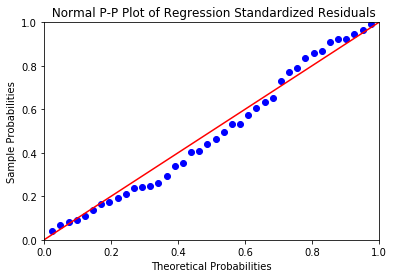

In [22]:
mba_salary_resid = mba_salary_lm.resid 
probplot = sm.ProbPlot( mba_salary_resid ) 
plt.figure( figsize = (8, 6)) 
probplot.ppplot( line='45' ) 
plt.title( " Normal P-P Plot of Regression Standardized Residuals")
plt.show() 

In [24]:
## From above graph- the diagonal line is cumulative distribution of a normal distribution, whereas the dots represent the cumulative distribution pf residuals
## since the dots are closer to the diagonal line , conclude that it follow normal distribution.

In [25]:
## Test of Homoscedasticity-An imp assumption of LR model is that residual have constant variance ,It can be obtained by drawing residual plot, which is plot b/w standardized residual value ad standardized predicted value
def get_standardized_values( vals ):       
    return (vals - vals.mean())/vals.std() 

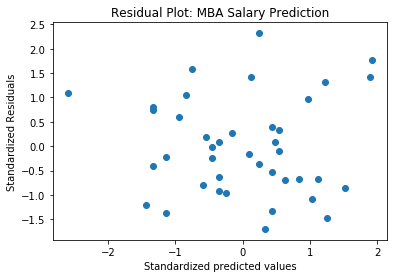

In [26]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), get_standardized_values( mba_salary_resid ) ) 
plt.title( "Residual Plot: MBA Salary Prediction" ); 
plt.xlabel( "Standardized predicted values") 
plt.ylabel( "Standardized Residuals");

In [27]:
## From the above figure,residuals are random and have no funnel shape , which meaning the residuals have constant varience

In [29]:
## Outlier analysis-Outliers are the observations whose values show a large deviation from the mean value
##Presence of an outlier can have a significant influence on the values of regression coefficient
##Z-score-Standardized distance of an observation form its mean value  𝑍=  (𝑌_𝑖−𝑌 ̅)/𝜎_𝑌 




In [30]:
from scipy.stats import zscore

In [40]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary ) 
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0)|(mba_salary_df.z_score_salary < -3.0)]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


In [41]:
## there are no obeservations that are outliers as per Z-score

In [42]:
## Cook's distance-It measures how much the predicted value of the dependant variable changes for all observation in the sample when a particular observation is excluded from the sample for the estimation of regression parameters
##A cook’s distance values of >1 indicates that highly influential observation


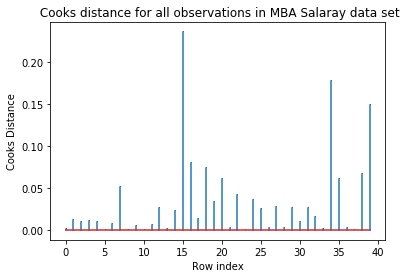

In [45]:
import numpy as np 
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance 
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," ); 
plt.title( " Cooks distance for all observations in MBA Salaray data set" );
plt.xlabel( "Row index") 
plt.ylabel( "Cooks Distance"); 

In [46]:
## From the above p[lot, none of the observations of cook's distance exceed 1 and none of them are outliers

In [47]:
## Leverage values-Leverage value of an observation measures the influence of that observation on the overall fit of the regression function and is related to the Mahalanobis distance
##Leverage value of > (3K+1)/n  treated as high influenced observation; where k is the no of feature and n is the sample size


In [48]:
from statsmodels.graphics.regressionplots import influence_plot 

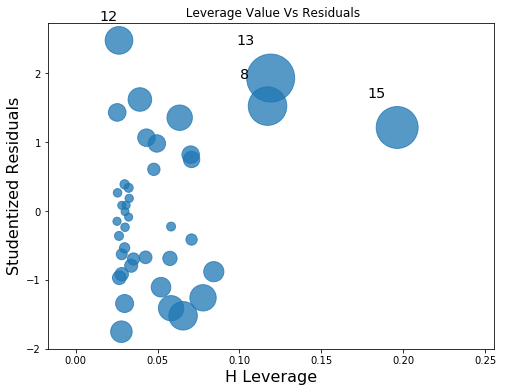

In [49]:
fig, ax = plt.subplots( figsize=(8,6) ) 
influence_plot( mba_salary_lm, ax = ax )
plt.title( " Leverage Value Vs Residuals") 
plt.show()

In [50]:
## From the above figure , the size of the circle proportional to the product of residual and leverage value; the larger the  dia more the influnce

In [51]:
##Making prediction  & measuring accuracy-Prediction should be made on the test/validation data
pred_y = mba_salary_lm.predict( test_X ) 


In [52]:
## Finding R-Square and RMSE
from sklearn.metrics import r2_score, mean_squared_error 
np.abs(r2_score(test_y, pred_y))

0.15664584974230378

In [53]:
## ie 15.64% of the varience in the validation set 

In [54]:
import numpy
np.sqrt(mean_squared_error(test_y, pred_y)) 

73458.043483468937

In [55]:
## RMSE means the avg error of the model makes predicting the outcome . The smaller the value of RMSE , Better the mode

In [56]:
## Calculating prediction intervals
from statsmodels.sandbox.regression.predstd import wls_prediction_std 


In [57]:
### Predict the y values 
## The confidence level is equivalent to 1 – the alpha level. So, if your significance level is 0.05, the corresponding confidence level is 95%.
pred_y = mba_salary_lm.predict( test_X ) 
## Predict the low and high interval values for y 
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, test_X, alpha = 0.1)


In [59]:
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'], 
                           'pred_y': pred_y, 'pred_y_left': pred_y_low, 'pred_y_right': pred_y_high  } )
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.832044,401276.972860
36,68.0,272707.227686,151576.715020,393837.740352
37,52.0,215737.829560,92950.942395,338524.716726
28,58.0,237101.353858,115806.869618,358395.838097
43,74.5,295851.045675,173266.083342,418436.008008
49,60.8,247070.998530,126117.560983,368024.436076
5,55.0,226419.591709,104507.444388,348331.739030
33,78.0,308313.101515,184450.060488,432176.142542
20,63.0,254904.290772,134057.999258,375750.582286
42,74.4,295494.986937,172941.528691,418048.445182


In [60]:
## MULTI LINEAR REGRESSION-IPL DATA SET
## Loading the dataset
ipl_auction_df = pd.read_csv( 'IPL IMB381IPL2013.csv' ) 

In [61]:
ipl_auction_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

In [62]:
## 130 OBSERVATIONS And 26 features

In [64]:
## Displaying records, initial 10 columns for the first 5 rows
ipl_auction_df.iloc[0:5, 0:10] 

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [65]:
## Creating the feature which contain the list of features that they will use for building model and rest feature can ignore .
X_features = ipl_auction_df.columns 

In [66]:
## Data set contains numerical and catagorical; catagorical variable has to encoded using dummy varibles before modeling
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',  'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',  'AVE-BL', 'ECON', 'SR-BL'] 

In [67]:
X_features

['AGE',
 'COUNTRY',
 'PLAYING ROLE',
 'T-RUNS',
 'T-WKTS',
 'ODI-RUNS-S',
 'ODI-SR-B',
 'ODI-WKTS',
 'ODI-SR-BL',
 'CAPTAINCY EXP',
 'RUNS-S',
 'HS',
 'AVE',
 'SR-B',
 'SIXERS',
 'RUNS-C',
 'WKTS',
 'AVE-BL',
 'ECON',
 'SR-BL']

In [68]:
## Encoding catagorical variable using dummy variables: if a catagorical variable has n catagories (eg- Player role: batsman, bower, wicket keeper,allrounder ) then we need n-1 dummy variables
## 3 dummy variable for player role

In [69]:
ipl_auction_df['PLAYING ROLE'].unique() 

array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [71]:
## the variable can be converted in to 4 dummy variables. Set the variabke value to 1 to indicate the role of the player
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,1,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [72]:
## Dummy variable is a binary variable used for representing whether an observation belonging to a catagory  or not . The reaon for (n-1) dummy varible for n catagory level is that the costant in the regression equation will create perfect multicollinearity . To drop on e catagory , the paramater drop fist() should be set tp true

In [73]:
categorical_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'CAPTAINCY EXP'] 

In [74]:
ipl_auction_encoded_df = pd.get_dummies( ipl_auction_df[X_features], columns = categorical_features, drop_first = True ) 

In [75]:
ipl_auction_encoded_df.columns

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'AGE_2', 'AGE_3', 'COUNTRY_BAN', 'COUNTRY_ENG',
       'COUNTRY_IND', 'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL',
       'COUNTRY_WI', 'COUNTRY_ZIM', 'PLAYING ROLE_Batsman',
       'PLAYING ROLE_Bowler', 'PLAYING ROLE_W. Keeper', 'CAPTAINCY EXP_1'],
      dtype='object')

In [77]:
## THE DATA set contanins the new dummy variables that have been created .  
X_features = ipl_auction_encoded_df.columns 

In [78]:
## Split the datset to train & validate/test
## The split function uses random_state, which is a seed function for reproducability randomness.Setting this varibkle to a fixed number will make sure that the records that go to training & test remain unchanger , hence the results can be reproduced .WE Use the value 42 
X = sm.add_constant( ipl_auction_encoded_df )
Y = ipl_auction_df['SOLD PRICE'] 
train_X, test_X, train_y, test_y = train_test_split( X , Y, train_size = 0.8, random_state = 42 )

C:\Users\C-Jayesh.P\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [80]:
## Building the model on the training data set- the summary provides all the meaures like accuracy, feture significance, sign of multi collnearity
ipl_model_1 = sm.OLS(train_y, train_X).fit() 
ipl_model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.362     
Dependent Variable:        SOLD PRICE              AIC:                       2965.2841 
Date:                      2020-02-25 15:50        BIC:                       3049.9046 
No. Observations:          104                     Log-Likelihood:            -1450.6   
Df Model:                  31                      F-statistic:               2.883     
Df Residuals:              72                      Prob (F-statistic):        0.000114  
R-squared:                 0.554                   Scale:                     1.1034e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   375827.1991 228849.9306  1.6422 0.1049  -80376.7996  832031.1978
T-RUNS                     -53.7890     32.7172 -1.6441 0.1045    -119.0096      11.4316
T-WKTS                    -132.5967    609.7525 -0.2175 0.8285   -1348.1162    1082.9228
ODI-RUNS-S                  57.9600     31.5071  1.8396 0.0700      -4.8482     120.7681
ODI-SR-B                  -524.1450   1576.6368 -0.3324 0.7405   -3667.1130    2618.8231
ODI-WKTS                   815.3944    832.3883  0.9796 0.3306    -843.9413    2474.7301
ODI-SR-BL                 -773.3092   1536.3334 -0.5033 0.6163   -3835.9338    2289.3154
RUNS-S                     114.7205    173.3088  0.6619 0.5101    -230.7643     460.2054
HS                       -5516.3354   2586.3277 -2.1329 0.0363  -10672.0855    -360.5853
AVE                      21560.2760   7774.2419  2.7733 0.0071    6062.6080   37057.9439
SR-B                     -1324.7218   1373.1303 -0.9647 0.3379   -4062.0071    1412.5635
SIXERS                    4264.1001   4089.6000  1.0427 0.3006   -3888.3685   12416.5687
RUNS-C                      69.8250    297.6697  0.2346 0.8152    -523.5687     663.2187
WKTS                      3075.2422   7262.4452  0.4234 0.6732  -11402.1778   17552.6622
AVE-BL                    5182.9335  10230.1581  0.5066 0.6140  -15210.5140   25576.3810
ECON                     -6820.7781  13109.3693 -0.5203 0.6045  -32953.8282   19312.2721
SR-BL                    -7658.8094  14041.8735 -0.5454 0.5871  -35650.7726   20333.1539
AGE_2                  -230767.6463 114117.2005 -2.0222 0.0469 -458256.1279   -3279.1648
AGE_3                  -216827.0808 152246.6232 -1.4242 0.1587 -520325.1772   86671.0155
COUNTRY_BAN            -122103.5196 438719.2796 -0.2783 0.7816 -996674.4194  752467.3801
COUNTRY_ENG             672410.7654 238386.2220  2.8207 0.0062  197196.5172 1147625.0135
COUNTRY_IND             155306.4011 126316.3449  1.2295 0.2229  -96500.6302  407113.4325
COUNTRY_NZ              194218.9120 173491.9293  1.1195 0.2667 -151630.9280  540068.7521
COUNTRY_PAK              75921.7670 193463.5545  0.3924 0.6959 -309740.7804  461584.3143
COUNTRY_SA               64283.3894 144587.6773  0.4446 0.6579 -223946.8775  352513.6563
COUNTRY_SL               17360.1530 176333.7497  0.0985 0.9218 -334154.7526  368875.0586
COUNTRY_WI               10607.7792 230686.7892  0.0460 0.9635 -449257.9303  470473.4887
COUNTRY_ZIM            -145494.4793 401505.2815 -0.3624 0.7181 -945880.6296  654891.6710
PLAYING ROLE_Batsman     75724.7643 150250.0240  0.5040 0.6158 -223793.1844  375242.7130
PLAYING ROLE_Bowler      15395.8752 126308.1272  0.1219 0.9033 -236394.7744  267186.5249
PLAYING ROLE_W. Keeper  -71358.6280 213585.7444 -0.3341 0.7393 -497134.0278  354416.7718
CAPTAINCY EXP_1         164113.3972 123430.6353  1.3296 0.1878  -81941.0772  410167.8716
----------------------------------------------------------------

In [81]:
## From above, as per the p value (<0.05), only features HS,AGE_2,AVE,COUNTRY_ENG have come out of significant. The model says that the none of other features influencing SOLD PRICE (at 95%CI) . This is very intutive and could be a result of multi collinearity effect of variables

In [85]:
## Multi-Collinearity
## To measure existence of Multi collinearity (vif- variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def get_vif_factors( X ):   
    X_matrix = X.as_matrix()    
    vif = [variance_inflation_factor( X_matrix, i ) for i in range
           ( X_matrix.shape[1])]   
    vif_factors = pd.DataFrame()    
    vif_factors['column'] = X.columns    
    vif_factors['vif'] = vif   
    return vif_factors 

In [86]:
## Now calling the above method with the X Features will return the VIF for the corresponding features
vif_factors = get_vif_factors( X[X_features] )
vif_factors

,column,vif
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [89]:
## Checking correlation of columns with large VIFs
## Genearte correlation heatmap to understand the correpation b/w the independant variables which can be used to decide which features to include the model, select with VIF>4
columns_with_large_vif = vif_factors[vif_factors.vif > 4].column 

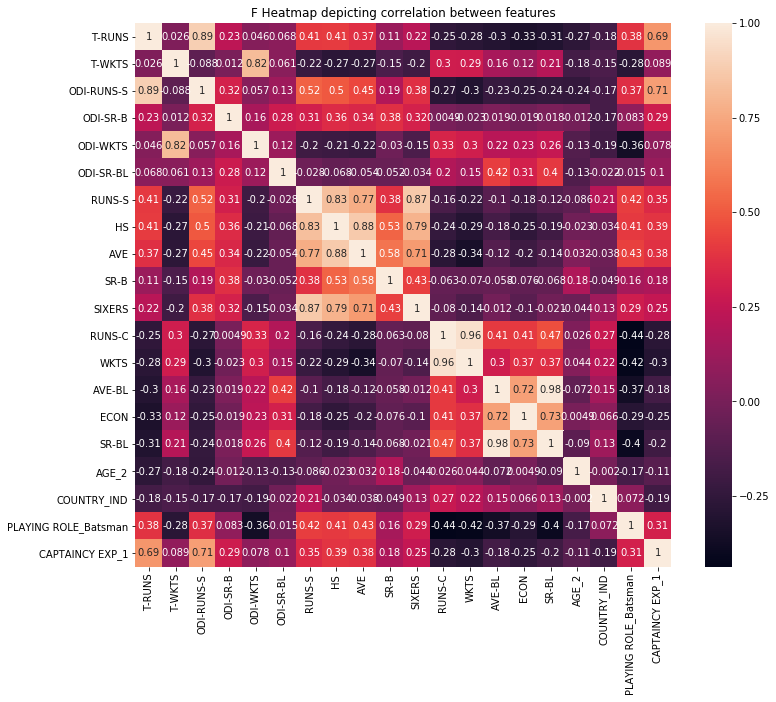

In [91]:
plt.figure( figsize = (12,10) )
sn.heatmap( X[columns_with_large_vif].corr(), annot = True );
plt.title( "F Heatmap depicting correlation between features"); 

In [92]:
## Observations from above fig:
##1/ T-RUNS & ODI RUNS , ODI & T- wickets are highly correlated
##2 .Batsman features like RUNS-S.HS,AVE,SIXERS are highly correlated, IIIly bowlers features ABE-BL,ECON,SR-BL are highly correlated
### To aviod multi collinearity , we keep only one column from each group of highly correalted variables and remove others;but which one keep and which one to avoid is depends on data and domamin infos.
## Maximum iteration will impove the model accuracy

columns_to_be_removed = ['T-RUNS', 'T-WKTS', 'RUNS-S', 'HS', 'AVE', 'RUNS-C', 'SR-B', 'AVE-BL',  'ECON', 'ODI-SR-B', 'ODI-RUNS-S', 'AGE_2', 'SR-BL'] 

In [93]:
X_new_features = list( set(X_features) - set(columns_to_be_removed) ) 

In [94]:
get_vif_factors( X[X_new_features] ) 

,column,vif
0,PLAYING ROLE_Batsman,2.680207
1,CAPTAINCY EXP_1,2.458745
2,COUNTRY_ENG,1.131869
3,PLAYING ROLE_Bowler,3.060168
4,COUNTRY_PAK,1.334773
5,COUNTRY_ZIM,1.205305
6,COUNTRY_IND,3.144668
7,COUNTRY_SA,1.416657
8,COUNTRY_NZ,1.173418
9,AGE_3,1.779861


In [95]:
## From the above, now no multi collinearity presnt, VIF<4

In [96]:
## Building a new model after removing multicollinearit
train_X = train_X[X_new_features] 
ipl_model_2 = sm.OLS(train_y, train_X).fit() 
ipl_model_2.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.728     
Dependent Variable:        SOLD PRICE              AIC:                       2965.1080 
Date:                      2020-02-25 17:15        BIC:                       3012.7070 
No. Observations:          104                     Log-Likelihood:            -1464.6   
Df Model:                  18                      F-statistic:               16.49     
Df Residuals:              86                      Prob (F-statistic):        1.13e-20  
R-squared:                 0.775                   Scale:                     1.2071e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
PLAYING ROLE_Batsman    121382.0570 106685.0356  1.1378 0.2584  -90700.7746  333464.8886
CAPTAINCY EXP_1         208376.6957  98128.0284  2.1235 0.0366   13304.6315  403448.7600
COUNTRY_ENG             682934.7166 216150.8279  3.1595 0.0022  253241.0920 1112628.3411
PLAYING ROLE_Bowler     -18315.4968 106035.9664 -0.1727 0.8633 -229108.0215  192477.0279
COUNTRY_PAK             122810.2480 159600.8063  0.7695 0.4437 -194465.6541  440086.1502
COUNTRY_ZIM             -67977.6781 390859.9289 -0.1739 0.8623 -844981.5006  709026.1444
COUNTRY_IND             282829.8091  96188.0292  2.9404 0.0042   91614.3356  474045.2827
COUNTRY_SA              108735.9086 115092.9596  0.9448 0.3474 -120061.3227  337533.1399
COUNTRY_NZ              142968.8843 151841.7382  0.9416 0.3491 -158882.5009  444820.2695
AGE_3                    -8950.6659  98041.9325 -0.0913 0.9275 -203851.5772  185950.2453
COUNTRY_BAN            -108758.6040 369274.1916 -0.2945 0.7691 -842851.4010  625334.1930
WKTS                      2431.8988   2105.3524  1.1551 0.2512   -1753.4033    6617.2008
SIXERS                    7862.1259   2086.6101  3.7679 0.0003    3714.0824   12010.1694
COUNTRY_SL               55912.3398 142277.1829  0.3930 0.6953 -226925.3388  338750.0184
PLAYING ROLE_W. Keeper  -55121.9240 169922.5271 -0.3244 0.7464 -392916.7280  282672.8801
ODI-WKTS                   772.4088    470.6354  1.6412 0.1044    -163.1834    1708.0009
ODI-SR-BL                  909.0021   1267.4969  0.7172 0.4752   -1610.6983    3428.7026
COUNTRY_WI              -22234.9315 213050.5847 -0.1044 0.9171 -445765.4766  401295.6135
----------------------------------------------------------------------------------------
Omnibus:                       8.635               Durbin-Watson:                  2.252
Prob(Omnibus):                 0.013               Jarque-Bera (JB):               8.345
Skew:                          0.623               Prob(JB):                       0.015
Kurtosis:                      3.609               Condition No.:                  1492 
========================================================================================
* The condition number is large (1e+03). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [97]:
## from abobe results, COUNTRY_IND,COUNTRY_EBG,SIXERS, CAPTAINCY EXP_1 have come out of statistically significant . So the features that decide the SOLD PRICE are 
## 1 whether the players belongs to india or england, how many sixers hit by the player and whehter player has previous captiancy experience or not
## New sginificant variables are

In [98]:
significant_vars = ['COUNTRY_IND', 'COUNTRY_ENG', 'SIXERS', 'CAPTAINCY EXP_1'] 
train_X = train_X[significant_vars] 
ipl_model_3 = sm.OLS(train_y, train_X).fit() 
ipl_model_3.summary2() 

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.704     
Dependent Variable:      SOLD PRICE          AIC:                   2961.8089 
Date:                    2020-02-25 17:19    BIC:                   2972.3864 
No. Observations:        104                 Log-Likelihood:        -1476.9   
Df Model:                4                   F-statistic:           62.77     
Df Residuals:            100                 Prob (F-statistic):    1.97e-26  
R-squared:               0.715               Scale:                 1.3164e+11
------------------------------------------------------------------------------
                   Coef.      Std.Err.    t    P>|t|     [0.025      0.975]   
------------------------------------------------------------------------------
COUNTRY_IND     387890.2538  63007.1511 6.1563 0.0000 262885.8606  512894.6471
COUNTRY_ENG     731833.6386 214164.4988 3.4172 0.0009 306937.3727 1156729.9045
SIXERS            8637.8344   1675.1313 5.1565 0.0000   5314.4216   11961.2472
CAPTAINCY EXP_1 359725.2741  74930.3460 4.8008 0.0000 211065.6018  508384.9463
------------------------------------------------------------------------------
Omnibus:                   1.130            Durbin-Watson:               2.238
Prob(Omnibus):             0.568            Jarque-Bera (JB):            0.874
Skew:                      0.223            Prob(JB):                    0.646
Kurtosis:                  3.046            Condition No.:               165  
==============================================================================

"""

In [99]:
## Observations
##1. All variables are statistically significant since p value <0.05
##2. overall model is significant as the p value and f static<0.05
##3. the model can explian 71.5% of varience in SOLD PRICE as R-squared:0.715 and Adj. R-squared:0.704
##4. Adj R-squared value is a measure that is calculated after normalizing SSE & SST with the corresponding DOF


In [101]:
## Residual Analysis in MLR
##1.P-P Plot- RESIDUAL normality checking
def draw_pp_plot( model, title ):    
    probplot = sm.ProbPlot( model.resid );    
    plt.figure( figsize = (8, 6) );    
    probplot.ppplot( line='45' );    
    plt.title( title );    
    plt.show(); 


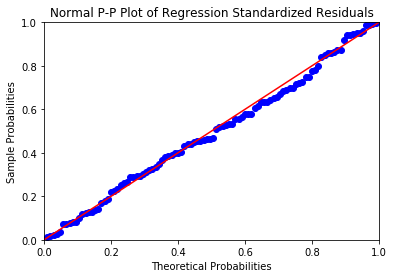

In [102]:
draw_pp_plot( ipl_model_3, "Normal P-P Plot of Regression Standardized Residuals" ); 

In [103]:
## Residuals follow an appoximate normal distribution

In [105]:
##  Residual Plot for homoscedasticity and model specification : plot b/w standardized fitted value and residuals. 
def plot_resid_fitted( fitted, resid, title):   
    plt.scatter( get_standardized_values( fitted ), get_standardized_values( resid ) )    
    plt.title( title )    
    plt.xlabel( "Standardized predicted values")  
    plt.ylabel( "Standardized residual values")      
    plt.show() 

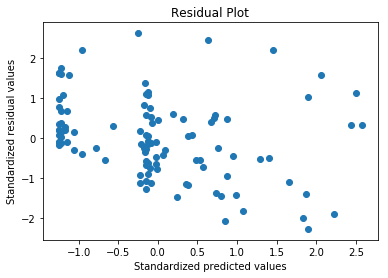

In [106]:
plot_resid_fitted( ipl_model_3.fittedvalues, ipl_model_3.resid, "Residual Plot") 

In [107]:
## dont shwoing any signs of heterodescity

In [108]:
## Detecting Influencers:
## In OLS, assume that each record in the data has equal influence on the model paramters(regression coefficients)which may not be true.
## Applying leverage values to find influnecers
k = train_X.shape[1] 
n = train_X.shape[0] 
print( "Number of variables:", k, " and number of observations:", n) 

Number of variables: 4  and number of observations: 104


In [109]:
leverage_cutoff = 3*((k + 1)/n)  
print( "Cutoff for leverage value: ", round(leverage_cutoff, 3) ) 

Cutoff for leverage value:  0.144


In [110]:
## so the observations with leverage value >0.178 are higly influential


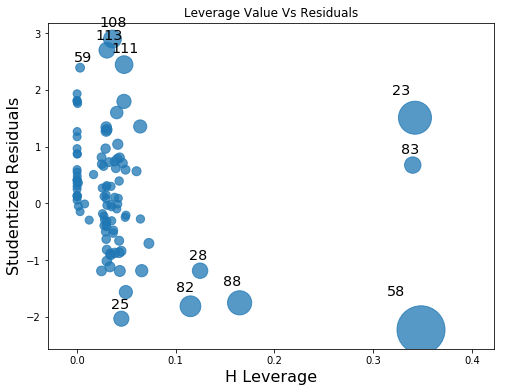

In [112]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots( figsize=(8,6) ) 
influence_plot( ipl_model_3, ax = ax ) 
plt.title( "Leverage Value Vs Residuals") 
plt.show() 

In [113]:
## The above diagram shows there are 3 observations 23,58,83 that have comparatively high leverage values with residuals. We can filter out these observations

In [114]:
ipl_auction_df[ipl_auction_df.index.isin( [23, 58, 83] )]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B,...,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
23,24,"Flintoff, A",2,ENG,CSK,Allrounder,3845,226,3394,88.82,...,116.98,2,105,2,52.50,9.55,33.00,2009,950000,1550000
58,59,"Mascarenhas, AD",2,ENG,RR+,Allrounder,0,0,245,95.33,...,101.37,1,331,19,17.42,7.01,14.95,2011,100000,100000
83,84,"Pietersen, KP",2,ENG,RCB+,Batsman,6654,5,4184,86.76,...,141.20,30,215,7,30.71,7.41,24.86,2009,1350000,1550000


In [116]:
## These observations  dont have larger residuals. So it may not be nesssary to remove these observations
## If the observation need to be removed , the following method drop() can be used
train_X_new = train_X.drop( [23, 58, 83], axis = 0) 
train_y_new = train_y.drop( [23, 58, 83], axis = 0)

In [117]:
## Continue iteration and futher pre preocessing to make better model

In [119]:
## Transforming repsonse variable:
## is a process of deriving new dependant and/or independant variable to identify the correct functional form of the regression model
## for eg-y~lnY,1/y etc
## It used to overcome the b follwing issues in MLR
##1. Poor fit (low R-sqaured value) 2. residuals normality 3. homoscedasticity issues 4. pattern in residual analysis indicating a potential linear relationship b/w the dependant and indepnedant variables
train_y = np.sqrt( train_y )
ipl_model_4 = sm.OLS(train_y, train_X).fit() 
ipl_model_4.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.707   
Dependent Variable: SOLD PRICE       AIC:                847.5124
Date:               2020-02-25 18:11 BIC:                858.0900
No. Observations:   104              Log-Likelihood:     -419.76 
Df Model:           4                F-statistic:        63.80   
Df Residuals:       100              Prob (F-statistic): 1.11e-26
R-squared:          0.718            Scale:              195.11  
-----------------------------------------------------------------
                    Coef.  Std.Err.   t    P>|t|   [0.025  0.975]
-----------------------------------------------------------------
COUNTRY_IND        18.3409   2.4257 7.5611 0.0000 13.5284 23.1534
COUNTRY_ENG        16.4571   8.2450 1.9960 0.0487  0.0991 32.8150
SIXERS              0.2680   0.0645 4.1553 0.0001  0.1400  0.3959
CAPTAINCY EXP_1    15.0686   2.8847 5.2236 0.0000  9.3454 20.7918
-----------------------------------------------------------------
Omnibus:               1.272        Durbin-Watson:          1.614
Prob(Omnibus):         0.529        Jarque-Bera (JB):       1.263
Skew:                  -0.162       Prob(JB):               0.532
Kurtosis:              2.568        Condition No.:          165  
=================================================================

"""

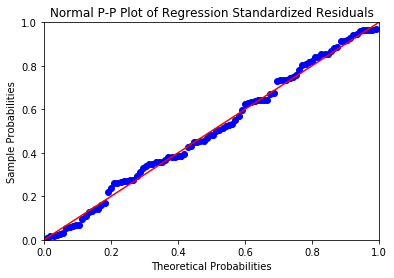

In [120]:
## From above the R-sqaured value of the model has increased to 0.751.WE can plot the P-P plot to see the noramlity
draw_pp_plot( ipl_model_4, "Normal P-P Plot of Regression Standardized Residuals" ); 

In [135]:
## Making predictions on validation set
## After the final model is built as per  requirements and the model has passed all diagonostic tests, we can apply the model on the validation test data to predict the SOLD PRICE
## as the model we have built predicts sqare root of the SOLD PRICE , weneed to preidct the values to get the actual SOLD PRICE of the players
pred_y = np.power( ipl_model_4.predict( test_X[train_X.columns] ), 2)  

In [136]:
##Measuring RMSE
from sklearn import metrics 
np.sqrt(metrics.mean_squared_error(pred_y, test_y)) 

633157.82477938314

In [137]:
##Measuring R-squared value
np.round( metrics.r2_score(pred_y,test_y),2 )

-689089.41000000003

In [130]:
## ERROR---CHECK IT SHOULD COME TO 0.44

In [132]:
## check for auto correlation: if autocorrelation exists, the standard error estimate of beta coefficient may underestimated and that will result over estimatuin of t-static balue, which will result on low p value
## thus no statsiticall significant variable may considered 
## Durbin-Watson static value signifies auto correaltion ~2 
# in this case its 2.2 and hence comcluded that there is no auto correaltion.

In [133]:
### THANK YOU